In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

data = datasets.load_breast_cancer()

In [2]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
#data = pd.DataFrame(data.data)
#data

In [3]:
X = data.data

y = data.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
model = DecisionTreeClassifier(criterion='gini',max_depth=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [6]:
expected = y_test
predicted = model.predict(X_test)

In [7]:
# np.count_nonzero(y_test, axis=0) counts only non-zeros entries
unique , counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique,counts)))

[[ 0  1]
 [45 69]]


In [17]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        45
           1       0.95      0.88      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

[[42  3]
 [ 8 61]]


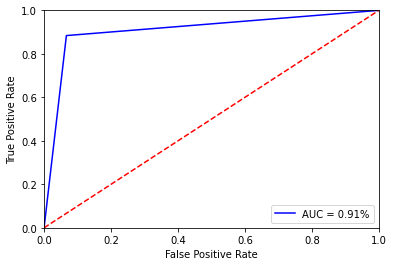

In [9]:
 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(expected, predicted)
roc_auc = metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f%%' %roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [10]:
probs

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [11]:
metrics.roc_curve(expected,predicted)

(array([0.        , 0.06666667, 1.        ]),
 array([0.        , 0.88405797, 1.        ]),
 array([2, 1, 0]))

In [12]:
threshold

array([2, 1, 0])

In [13]:
fpr # 6/46

array([0.        , 0.06666667, 1.        ])

In [14]:
tpr # 65/68

array([0.        , 0.88405797, 1.        ])

In [15]:
#AUC was calculated based on Trapezoidal rule(Aprrox region under the curve.)
roc_auc

0.908695652173913

In [19]:
cnf_matrix=metrics.confusion_matrix(expected, predicted, )
cnf_matrix

array([[42,  3],
       [ 8, 61]], dtype=int64)

In [22]:
names = data.target_names.tolist()
names

['malignant', 'benign']

# I have explained below function in below cells

In [71]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
   
    import itertools
    
    print('Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    #fmt = '.d' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print(tick_marks)

Confusion Matrix
[0 1]


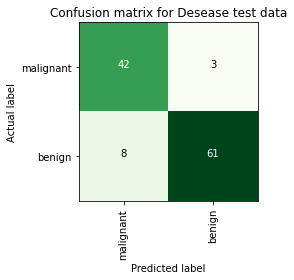

In [72]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix for Desease test data')

30.5
range(0, 2)
range(0, 2)


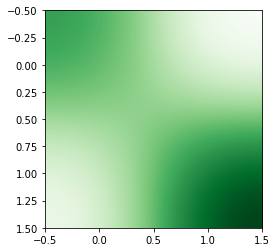

In [73]:
import itertools
plt.imshow(cnf_matrix, interpolation='quadric', cmap=plt.cm.Greens) #Display data as an image,The input may either be actual RGB(A) data, or 2D scalar data, 
print(cnf_matrix.max()/2)
print('{}'.format(range(cnf_matrix.shape[0])))
print(range(cnf_matrix.shape[1]))

print(itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])))

In [74]:
for i , j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    print(i , j)

0 0
0 1
1 0
1 1


In [75]:
a = [1,2,3]
b = [4,5,6]
l1 = [(x*y) for x in a for y in b ]
print(l1)
l2 = [(x*y) for x,y in itertools.product(a,b)]
print(l1)
print(format(cnf_matrix[0, 1]))

[4, 5, 6, 8, 10, 12, 12, 15, 18]
[4, 5, 6, 8, 10, 12, 12, 15, 18]
3
